In [2]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generator

In [7]:
import sys
import numpy as np
from keras.layers import Dense, Reshape, LeakyReLU # Import LeakyReLU directly from keras.layers
from keras.layers import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU # Remove this line
from keras.models import Sequential, Model
from keras.optimizers import Adam

block_size = 128
num_blocks=4
# Change 'lr' to 'learning_rate'
OPTMIZER = Adam(learning_rate=0.0002, decay=8e-9)

generator = Sequential()
generator.add(Dense(block_size, input_shape=(100, )))
generator.add(LeakyReLU(alpha=0.02))
generator.add(BatchNormalization(momentum=0.8))

for i in range(num_blocks-1):
    block_size = block_size * 2
    generator.add(Dense(block_size))
    generator.add(LeakyReLU(alpha=0.2))
    generator.add(BatchNormalization(momentum=0.8))

generator.add(Dense(28 * 28 * 1, activation='tanh'))
generator.add(Reshape((28, 28, 1)))
generator.compile(loss="binary_crossentropy", optimizer=OPTMIZER)

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [8]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 784)                 │         803,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,514,128 (5.78 MB)

 Trainable params: 1,510,288 (5.76 MB)

 Non-trainable params: 3,840 (15.00 KB)

# Discriminator

In [10]:
import sys
import numpy as np
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, LeakyReLU # Import LeakyReLU directly from keras.layers
#from keras.layers.advanced_activations import LeakyReLU # Remove this line
from keras.models import Sequential, Model
from keras.optimizers import Adam

SHAPE =  (28, 28, 1)
CAPACITY = 28 * 28 * 1
# Change 'lr' to 'learning_rate' for consistency with the generator
OPTMIZER = Adam(learning_rate=0.0002, decay=8e-9)

discriminator = Sequential()
discriminator.add(Flatten(input_shape = SHAPE))
discriminator.add(Dense(CAPACITY, input_shape=SHAPE))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(int(CAPACITY/2)))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss="binary_crossentropy", optimizer=OPTMIZER)

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [11]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 392)                 │         307,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 392)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             393 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 923,553 (3.52 MB)

 Trainable params: 923,553 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

# GAN

In [13]:
OPTIMIZER = Adam(learning_rate=0.0002, decay=8e-9)
discriminator.trainable = False

gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss="binary_crossentropy", optimizer=OPTMIZER)

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [14]:
gan.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 28, 28, 1)           │       1,514,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 1)                   │         923,553 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,437,681 (9.30 MB)

 Trainable params: 1,510,288 (5.76 MB)

 Non-trainable params: 927,393 (3.54 MB)

# Load MNIST

In [16]:
model_type = -1
def load_MNIST(model_type):

    allowed_types = [-1,0,1,2,3,4,5,6,7,8,9]

    if model_type not in allowed_types:
        print('ERROR: Only Integer Values from -1 to 9 are allowed')

    (X_train, Y_train), (_, _) = mnist.load_data()

    xxx = X_train
#     print("X_train: ", X_train.shape)
    if model_type!=-1:
        X_train = X_train[np.where(Y_train==int(model_type)) [0]]
        print("X_train: ", X_train.shape)

    X_train = ( np.float32(X_train) - 127.5) / 127.5
#     X_train = np.expand_dims(X_train, axis=3)

    return X_train, Y_train, xxx

In [17]:
X_train, Y_train, xxx = load_MNIST(model_type=3)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
X_train:  (6131, 28, 28)


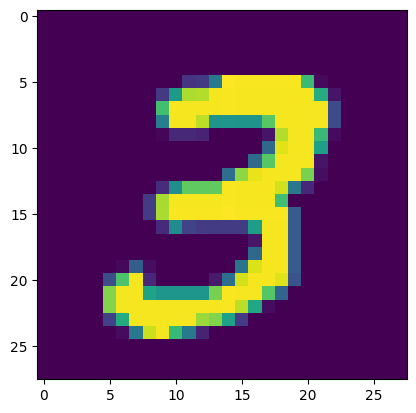

In [18]:
img = plt.imshow(X_train[0])

## Grab a batch

In [19]:
from random import randint

# Grab a batch
count_real_images = int(32/2)
starting_index = randint(0, (len(X_train) - count_real_images ))
starting_index

1504

In [20]:
real_images_raw = X_train[starting_index : (starting_index + count_real_images)]
real_images_raw.shape

(16, 28, 28)

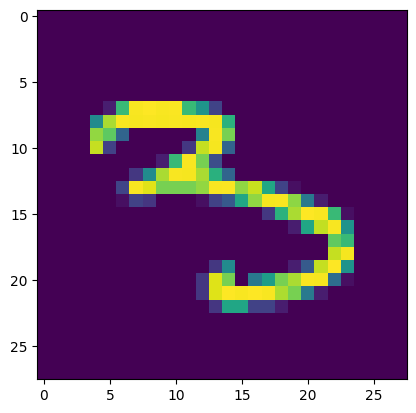

In [21]:
img = plt.imshow(real_images_raw[0])

In [22]:
x_real_images = real_images_raw.reshape(count_real_images, 28, 28, 1)
x_real_images.shape

(16, 28, 28, 1)

In [23]:
y_real_lebels = np.ones([count_real_images, 1])
y_real_lebels.shape

(16, 1)

##  Grab Generated Images for this training batch

In [24]:
LATENT_SPACE_SIZE = 100
def sample_latent_space(instances):
        return np.random.normal(0, 1, (instances, LATENT_SPACE_SIZE))

In [25]:
# Grab Generated Images for this training batch
latent_space_samples = sample_latent_space(count_real_images)
latent_space_samples.shape

(16, 100)

In [26]:
x_generated_images = generator.predict(latent_space_samples)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step


In [27]:
y_generated_labels = np.zeros([32-count_real_images,1])
y_generated_labels.shape

(16, 1)

In [28]:
print(y_generated_labels[0], y_real_lebels[0])

[0.] [1.]


In [29]:
# Combine to train on the discriminator
x_batch = np.concatenate( [x_real_images, x_generated_images] )
y_batch = np.concatenate( [y_real_lebels, y_generated_labels] )

In [30]:
x_batch.shape

(32, 28, 28, 1)

In [31]:
y_batch[16]

array([0.])

## Train Adversarial Net

In [32]:
# Now, train the discriminator with this batch
discriminator_loss = discriminator.train_on_batch(x_batch,y_batch)
print("ok")

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


ok


In [33]:
# Generate Noise
x_latent_space_samples = sample_latent_space(32)
y_generated_labels = np.ones([32,1])
y_generated_labels.shape

(32, 1)

In [34]:
generator_loss = gan.train_on_batch(x_latent_space_samples, y_generated_labels)

In [35]:
print ('Epoch: '+str(int(1))+', [Discriminator :: Loss:'+str(discriminator_loss)+'], [ Generator :: Loss:'+str(generator_loss)+']')


Epoch: 1, [Discriminator :: Loss:1.186697], [ Generator :: Loss:1.0114012]
